Unit 1, Sprint 2, Module 1

###Learning Objectives:
- Student can create a scatterplot
- Student can identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- Student can identify linear and nonlinear relationships from a scatterplot
- Student can calculate and interpret linear correlation
- Student can calculate and interpret the slope and intercept of a simple linear regression model
- Sudent can predict a response from a simple linear regression model
- Student can calculate and interpret a residual

#Use the following information to answer questions 1 - 13 in the assignment:



###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [1]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in g
- Head, the head size in cubic cm

1) If we wish to predict brain weight from head size, which variable is the independent variable (also called the feature, explanatory or x variable) and which variable is the dependent variable (also called the target, response or y variable)?

Answer here: Independent Variable is Head Size, Dependent Variable is Brain Weight

2) Draw a scatterplot showing the relationship between brain weight and head size.  Make sure to graph the correct variable on the correct axis and label your graph.

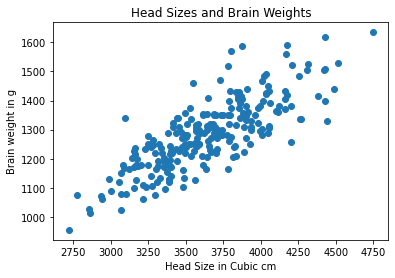

In [2]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(x = df['Head'], y = df['Brain'])

ax.set_xlabel('Head Size in Cubic cm')
ax.set_ylabel('Brain weight in g')
ax.set_title('Head Sizes and Brain Weights')

plt.show()

3) Describe the strength and direction of the relationship between head size and brain weight.

Answer here: Looks like a pretty strong positive relationship between head size and Brain weight

4) Determine if there is any missing data in the dataset.

In [3]:
### YOUR CODE HERE ###
print(df.shape)
df.info()

(237, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  237 non-null    int64
 1   Age     237 non-null    int64
 2   Head    237 non-null    int64
 3   Brain   237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


Answer here: No Null Values

5) Calculate and interpret the correlation coefficient for the relationship between head size and brain weight.  

In [4]:
### YOUR CODE HERE ###
c = np.corrcoef(df['Head'],df['Brain'])
c

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

Answer here: The correlation between Head size and brain weight in this dataset is 0.8

6) Without doing any other calculations, determine the correlation of brain weight with head size.

Answer here: A correlation coefficient of 0.8 means that there is a strong correlation between head size and brain weight.


7) Use Python to calculate the slope and intercept terms for the model of head size and brain weight.

In [5]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
model = ols('Brain ~ Head', data = df).fit()

model.params

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept    325.573421
Head           0.263429
dtype: float64

8) Use the model output above to write the linear model relating head size to brain weight (ie fill in the b terms with the correct numbers from above).

$$\hat{Y} = b_0 + b_1X$$



Answer here: $$\hat{Y} = 325.57 + 0.26X$$

9) What does the slope term tell us about the relationship between head size and brain weight?

Answer here: Brain weight is expected to be 0.26g more for every 1 cubic cm that a person's head size is

10) What does the intercept tell us about the relationship between head size and brain weight?

Answer here: When head size is 0, brain weight is expected to be 325.57g

11) Draw a scatterplot with the regression line overlayed on top of the points.

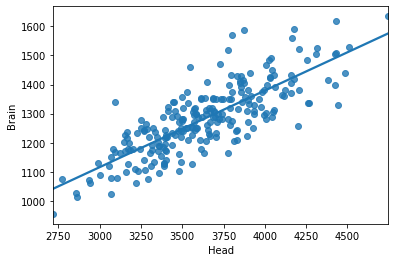

In [6]:
### YOUR CODE HERE ###
import seaborn as sns

ax = sns.regplot(x = "Head", y = "Brain", data = df, ci = None)

12) A healty human has a brain size of 4100 cubic cm, how much do we expect his or her brain to weigh?

In [7]:
### YOUR CODE HERE ###
model.params[0] + model.params[1]*4100

1405.6337129559786

Answer here: 1405.63g

13) Calculate and interpret the model residual for for the first observation in the dataset (head size = 4512 cubic cm).

In [8]:
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [9]:
### YOUR CODE HERE ###
prediction = model.params[0] + model.params[1]*4512
observation = 1530
observation - prediction

15.833399174388887

Answer here: Our model underestimated the brain weight by about 15.83g

#Use the following information to answer questions 14 - 16 in the assignment:



Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [10]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


14) Write a function that replaces the _ in each animal name with a space.  Eg. Asian_elephant = Asian elephant.  Hint: use the string.replace(old, new, count) function.

In [19]:
### YOUR CODE HERE ###
print(sleep.shape)
for i in range(42):
  string = sleep['Animal'][i] 
  sleep['Animal'][i] = string.replace('_',' ')
sleep.info()

(42, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Animal     42 non-null     object 
 1   Body       42 non-null     float64
 2   Brain      42 non-null     float64
 3   SWsleep    42 non-null     float64
 4   Parasleep  42 non-null     float64
 5   Totsleep   42 non-null     float64
 6   Life       42 non-null     float64
 7   Gest       42 non-null     float64
 8   Pred       42 non-null     int64  
 9   Exposure   42 non-null     int64  
 10  Danger     42 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 3.7+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
sleep['Animal']

0     African giant pouched rat
1                Asian elephant
2                        Baboon
3                 Big brown bat
4               Brazilian tapir
5                           Cat
6                    Chimpanzee
7                    Chinchilla
8                           Cow
9         Eastern American mole
10                      Echidna
11            European hedgehog
12                       Galago
13                         Goat
14               Golden hamster
15                    Gray seal
16              Ground squirrel
17                   Guinea pig
18                        Horse
19    Lesser short tailed shrew
20             Little brown bat
21                        Human
22                        Mouse
23                   Musk shrew
24           N American opossum
25        Nine banded armadillo
26                   Owl monkey
27                 Patas monkey
28                   Phanlanger
29                          Pig
30                       Rabbit
31      

15) Plot the relationship between life expectancy and total sleep and gestation time and total sleep.

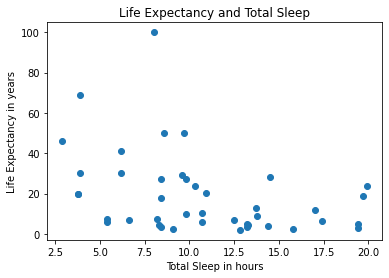

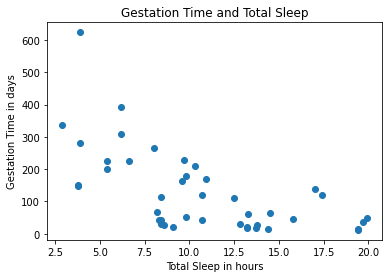

In [17]:
### YOUR CODE HERE ###
fig, ax = plt.subplots()

plt.scatter(x = sleep['Totsleep'],y = sleep['Life'])

ax.set_title('Life Expectancy and Total Sleep')
ax.set_xlabel('Total Sleep in hours')
ax.set_ylabel('Life Expectancy in years')

plt.show()

fig, ax = plt.subplots()

plt.scatter(x = sleep['Totsleep'],y = sleep['Gest'])

ax.set_title('Gestation Time and Total Sleep')
ax.set_xlabel('Total Sleep in hours')
ax.set_ylabel('Gestation Time in days')

plt.show()


16) Calculate the correlation between life expectancy and total sleep and between gestation time and total sleep.

In [20]:
### YOUR CODE HERE ###
LETS = np.corrcoef(sleep['Totsleep'], sleep['Life'])
GTTS = np.corrcoef(sleep['Totsleep'], sleep['Gest'])

print(LETS)
print(GTTS)

[[ 1.         -0.38244618]
 [-0.38244618  1.        ]]
[[ 1.         -0.61447431]
 [-0.61447431  1.        ]]


The correlation coefficient between Life Expectancy and Total Sleep is -0.38 which is a weak-ish correlation.

The correlation coefficient between Gestation Time and Total Sleep is -0.61 which is a strong-ish correlation.

#Portfolio Project Assignment.

We're coming into the home stretch!  Finalize your project results.  Ask any lingering questions, and complete any revisions you have.  This would be a good time to have a classmate take a look at your project and point out anything missing or any obvious errors (they happen to everyone!).